# Relational Classification and Iterative Classification
## Relational Classifiers
### Method
![](figures/05-message_22.jpeg)
![](figures/05-message_23.jpeg)

### Example
![](figures/05-message_24.jpeg)
![](figures/05-message_25.jpeg)
![](figures/05-message_26.jpeg)
![](figures/05-message_27.jpeg)
![](figures/05-message_28.jpeg)
![](figures/05-message_29.jpeg)
![](figures/05-message_30.jpeg)
![](figures/05-message_31.jpeg)
![](figures/05-message_32.jpeg)

### Quick Implementation

In [221]:
import networkx as nx
import numpy as np
from scipy import sparse

def get_update_matrix(G):
    X = nx.to_scipy_sparse_matrix(G)
    degrees = X.sum(axis=0).A[0]
    D = sparse.diags(1.0/degrees)
    return D.dot(X)

def get_labels(G):
    labels = []
    for node in G:
        prob_1 = G.nodes[node].get('label', 0.5)
        labels.append(prob_1)
    return np.array(labels)

def update(G, label_proba):
    update_mat = _get_update_matrix(G)
    for idx, node in enumerate(G):
        if not 'label' in G.nodes[node]:
            label_proba[idx] = update_mat[idx].dot(label_proba)
    return label_proba

In [222]:
G = nx.Graph()
G.add_nodes_from(range(1,10))
G.add_edges_from([ (1, 2), (1, 3), (1, 4), (2, 3), (3, 4),
                   (4, 5), (4, 6), (5, 6), (5, 7), (5, 8),
                   (6, 7), (6, 8), (7, 8), (7, 9)
                 ])
G.nodes[1]['label'] = 0
G.nodes[2]['label'] = 0
G.nodes[6]['label'] = 1
G.nodes[7]['label'] = 1

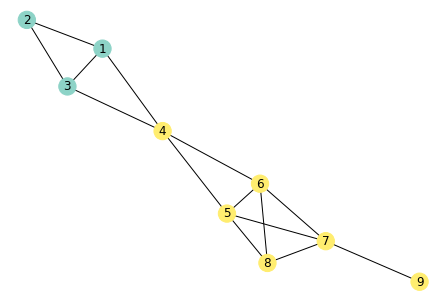

In [223]:
label_proba = get_labels(G)
update_mat = get_update_matrix(G)

for _ in range(4):
    label_proba = update(G, label_proba)
    
nx.draw(G, node_color=(label_proba>0.5), with_labels=True, cmap='Set3')

## Iteractvie Classification
### Method
![](figures/05-message_34.jpeg)
![](figures/05-message_35.jpeg)
![](figures/05-message_36.jpeg)
![](figures/05-message_37.jpeg)

### Example
![](figures/05-message_38.jpeg)
![](figures/05-message_39.jpeg)
![](figures/05-message_40.jpeg)
![](figures/05-message_41.jpeg)
![](figures/05-message_42.jpeg)
![](figures/05-message_43.jpeg)
![](figures/05-message_44.jpeg)
![](figures/05-message_45.jpeg)
![](figures/05-message_46.jpeg)
![](figures/05-message_47.jpeg)

## Summary
![](figures/05-message_48.jpeg)